<p><font size="6"><b>01 - Pandas: Data Structures </b></font></p>


> *DS Data manipulation, analysis and visualisation in Python*  
> *June, 2019*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Let's directly start with importing some data: the `titanic` dataset about the passengers of the Titanic and their survival:

In [3]:
df = pd.read_csv("../data/titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Starting from reading such a tabular dataset, Pandas provides the functionalities to answer questions about this data in a few lines of code. Let's start with a few examples as illustration:

<div class="alert alert-warning">

 <ul>
  <li>What is the age distribution of the passengers?</li>
</ul> 

</div>

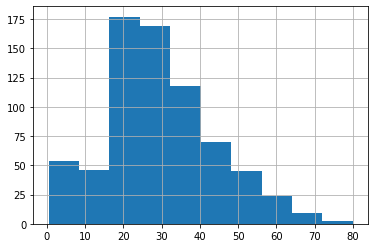

In [5]:
df['Age'].hist()

<div class="alert alert-warning">

 <ul>
  <li>How does the survival rate of the passengers differ between sexes?</li>
</ul> 

</div>

In [6]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,0.742038
male,0.188908


<div class="alert alert-warning">

 <ul>
  <li>Or how does the survival rate differ between the different classes of the Titanic?</li>
</ul> 

</div>

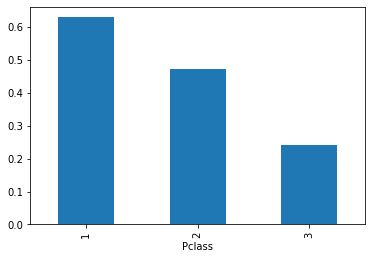

In [7]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

<div class="alert alert-warning">

 <ul>
  <li>Are young people (e.g. < 25 years) likely to survive?</li>
</ul> 

</div>

In [8]:
df['Survived'].sum() / df['Survived'].count()

0.3838383838383838

In [9]:
df25 = df[df['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

0.4119601328903654

All the needed functionality for the above examples will be explained throughout the course, but as a start: the data types to work with.

# The pandas data structures: `DataFrame` and `Series`

Pandas provides two fundamental data objects, for 1D (``Series``) and 2D data (``DataFrame``).

## DataFrame: 2D tabular data


A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

<img align="left" width=50% src="../img/schema-dataframe.svg">

For the examples here, we are going to create a small DataFrame with some data about a few countries.

When creating a DataFrame manually, a common way to do this is from dictionary of arrays or lists:

In [10]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In practice, you will of course often import your data from an external source (text file, excel, database, ..), which we will see later.

Note that in the IPython notebook, the dataframe will display in a rich HTML view.

### Attributes of the DataFrame

The DataFrame has a built-in concept of named rows and columns, the **`index`** and **`columns`** attributes:

In [11]:
countries.index

RangeIndex(start=0, stop=5, step=1)

By default, the index is the numbers *0* through *N - 1*

In [12]:
countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

To check the data types of the different columns:

In [13]:
countries.dtypes

country        object
population    float64
area            int64
capital        object
dtype: object

An overview of that information can be given with the `info()` method:

In [14]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
country       5 non-null object
population    5 non-null float64
area          5 non-null int64
capital       5 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 240.0+ bytes


A DataFrame has also a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [15]:
countries.values

array([['Belgium', 11.3, 30510, 'Brussels'],
       ['France', 64.3, 671308, 'Paris'],
       ['Germany', 81.3, 357050, 'Berlin'],
       ['Netherlands', 16.9, 41526, 'Amsterdam'],
       ['United Kingdom', 64.9, 244820, 'London']], dtype=object)

<div class="alert alert-info">

__NumPy__ provides

  <ul>
    <li>multi-dimensional, homogeneously typed arrays  (single data type!)</li>
  </ul> 
<br>

__Pandas__ provides

  <ul>
    <li>2D, heterogeneous data structure (multiple data types!)</li>
    <li>labeled (named) row and column index</li>
  </ul> 


</div>

## One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [16]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

And often, you access a Series representing a column in the data, using typical `[]` indexing syntax and the column name:

In [17]:
countries['area']

0     30510
1    671308
2    357050
3     41526
4    244820
Name: area, dtype: int64

### Attributes of a Series: `index` and `values`

The series also has an **index**, which by default is the numbers *0* through *N - 1* (but no `.columns`):

In [18]:
s.index

RangeIndex(start=0, stop=4, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [19]:
s.values

array([0.1, 0.2, 0.3, 0.4])

We can access series values via the index, just like for NumPy arrays:

In [20]:
s[0]

0.1

Unlike the NumPy array, though, this index can be something other than integers:

In [21]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int64

In [22]:
s2['c']

2

### Pandas Series versus dictionaries

In this way, a ``Series`` object can be thought of as similar to an ordered dictionary mapping one typed value to another typed value.

In fact, it's possible to construct a series directly from a Python dictionary:

In [23]:
pop_dict = {'Germany': 81.3, 
            'Belgium': 11.3, 
            'France': 64.3, 
            'United Kingdom': 64.9, 
            'Netherlands': 16.9}
population = pd.Series(pop_dict)
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

We can index the populations like a dict as expected ...

In [24]:
population['France']

64.3

... but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [25]:
population * 1000

Germany           81300.0
Belgium           11300.0
France            64300.0
United Kingdom    64900.0
Netherlands       16900.0
dtype: float64

## Some useful methods on these data structures

Exploration of the Series and DataFrame is essential (check out what you're dealing with). 

In [26]:
countries.head() # Top rows

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [27]:
countries.tail() # Bottom rows

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


The ``describe`` method computes summary statistics for each column:

In [28]:
countries.describe()

,population,area
count,5.000000,5.000000
mean,47.740000,269042.800000
std,31.519645,264012.827994
min,11.300000,30510.000000
25%,16.900000,41526.000000
50%,64.300000,244820.000000
75%,64.900000,357050.000000
max,81.300000,671308.000000


**Sort**ing your data **by** a specific column is another important first-check:

In [29]:
countries.sort_values(by='population')

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
3,Netherlands,16.9,41526,Amsterdam
1,France,64.3,671308,Paris
4,United Kingdom,64.9,244820,London
2,Germany,81.3,357050,Berlin


The **`plot`** method can be used to quickly visualize the data in different ways:

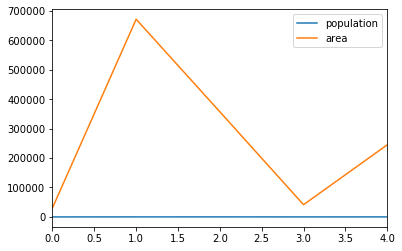

In [30]:
countries.plot()

However, for this dataset, it does not say that much:

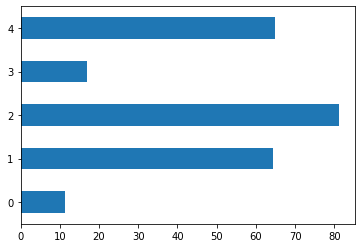

In [31]:
countries['population'].plot(kind='barh')

<div class="alert alert-success">
    <b>EXERCISE</b>:

<ul>
    <li>You can play with the `kind` keyword of the `plot` function in the figure above: 'line', 'bar', 'hist', 'density', 'area', 'pie', 'scatter', 'hexbin', 'box'</li>
</ul>
</div>

# Importing and exporting data

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* Parquet
* ...

In [32]:
# pd.read_

In [33]:
# countries.to_

<div class="alert alert-info">


**Note: I/O interface**


  <ul>
    <li>All readers are `pd.read_...`</li>
    <li>All writers are `DataFrame.to_...` </li>
  </ul> 


</div>

# Application on a real dataset

Throughout the pandas notebooks, many of exercises will use the titanic dataset. This dataset has records of all the passengers of the Titanic, with characteristics of the passengers (age, class, etc. See below), and an indication whether they survived the disaster.


The available metadata of the titanic data set provides the following information:

VARIABLE   |  DESCRIPTION
------ | --------
survival       | Survival (0 = No; 1 = Yes)
pclass         | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name           | Name
sex            | Sex
age            | Age
sibsp          | Number of Siblings/Spouses Aboard
parch          | Number of Parents/Children Aboard
ticket         | Ticket Number
fare           | Passenger Fare
cabin          | Cabin
embarked       | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


<div class="alert alert-success">
    <b>EXERCISE</b>:

<ul>
    <li>Read the CVS file (available at `../data/titanic.csv`) into a pandas DataFrame. Call the result `df`.</li>
</ul>

</div>

In [34]:
df = pd.read_csv("../data/titanic.csv")

<div class="alert alert-success">
    <b>EXERCISE</b>:

<ul>
    <li>Quick exploration: show the first 5 rows of the DataFrame.</li>
</ul>

</div>

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">
    <b>EXERCISE</b>:

<ul>
    <li>How many records (i.e. rows) has the titanic dataset?</li>
</ul>

</div>

In [36]:
len(df)

891

<div class="alert alert-success">
    <b>EXERCISE</b>:

<ul>
    <li>Select the 'Age' column (remember: we can use the [] indexing notation and the column label).</li>
</ul>

</div>

In [37]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>:

<ul>
    <li>Make a box plot of the Fare column.</li>
</ul>
</div>

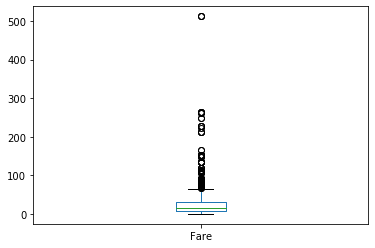

In [38]:
df['Fare'].plot(kind='box')

<div class="alert alert-success">
    
**EXERCISE**:

* Sort the rows of the DataFrame by 'Age' column, with the oldest passenger at the top. Check the help of the `sort_values` function and find out how to sort from the largest values to the lowest values

</div>

In [39]:
df.sort_values(by='Age', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q


---
# Acknowledgement


> This notebook is partly based on material of Jake Vanderplas (https://github.com/jakevdp/OsloWorkshop2014).
